In [3]:
import matplotlib.pyplot as plt
import polars as pl

## Capacity distribution

Upper row: linear buckets, lower row: log2 buckets\
Left column: node count, right column: sum capacity

Skew = 1: every linear bucket has similar capacity, every log2 bucket has similar node

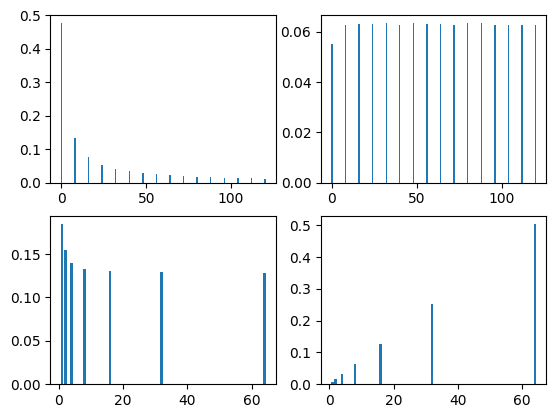

In [39]:
df = pl.read_csv("capacity_distr.csv").filter(pl.col("method") == "Offset")


def plot(skew):
    fig, axs = plt.subplots(2, 2)
    for row, ty in [(0, "Linear"), (1, "Log2")]:
        skew1_df = df.filter(
            pl.col("skew") == skew, pl.col("bucket_type") == ty
        ).with_columns(
            pl.col("node_count") / pl.col("node_count").sum(),
            pl.col("sum_capacity") / pl.col("sum_capacity").sum(),
        )
        data = skew1_df.select(
            "class_start_capacity", "node_count", "sum_capacity"
        ).to_numpy()
        axs[row, 0].bar(data[:, 0], data[:, 1])
        axs[row, 1].bar(data[:, 0], data[:, 2])


plot(1.0)

Skew = 2 (1.9 is better): every log bucket has similar capacity

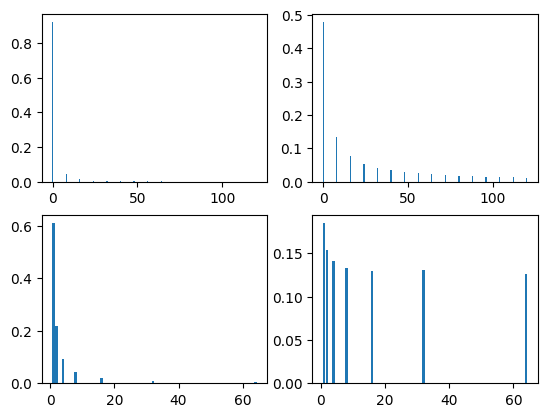

In [40]:
plot(2.0)